In [96]:
using SparseArrays
using LinearAlgebra
using Plots

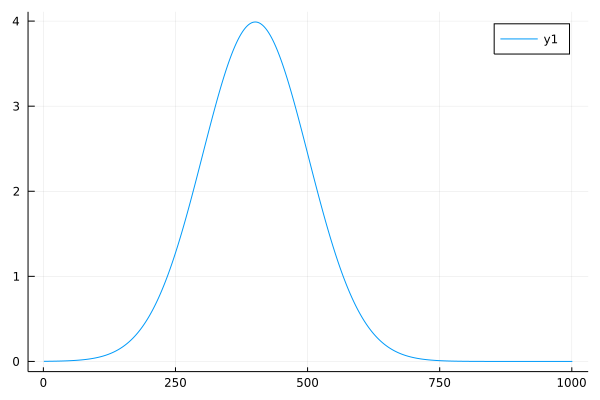

In [120]:
L = 1
dx = 0.001
N = Int64(floor(L/dx)) + 1

x0 = zeros(N);
mu = 0.4
sigma = 0.1
for i = 1:N
    x0[i] = exp(-(dx*(i-1)-mu)^2/2/sigma^2)/sqrt(2*pi)/sigma
end
sum1 = sum(x0)*dx
plot(x0)


In [124]:
x = copy(x0)
boundary = "b1"
id1 = Array{Int64,1}()
id2 = Array{Int64,1}()
v = Array{Float64,1}()   
#Threads.@threads for k in 1:Nx*Ny
for k in 2:N-1
    append!(id1, k)
    append!(id2, k)
    append!(v, -2.0)
    append!(id1, k)
    append!(id2, k-1)
    append!(v, 1.0)
    append!(id1, k)
    append!(id2, k+1)
    append!(v, 1.0)
end

if(boundary == "b1")
    append!(id1, 1)
    append!(id2, 1)
    append!(v, -2.0)
    append!(id1, 1)
    append!(id2, 2)
    append!(v, 2.0)

    append!(id1, N)
    append!(id2, N)
    append!(v, -2.0)
    append!(id1, N)
    append!(id2, N-1)
    append!(v, 2.0)
    
elseif(boundary == "b2")
    append!(id1, 1)
    append!(id2, 1)
    append!(v, -7.0/2)
    append!(id1, 1)
    append!(id2, 2)
    append!(v, 4.0)
    append!(id1, 1)
    append!(id2, 3)
    append!(v, -0.5)

    append!(id1, N)
    append!(id2, N)
    append!(v, -7.0/2)
    append!(id1, N)
    append!(id2, N-1)
    append!(v, 4.0)
    append!(id1, N)
    append!(id2, N-2)
    append!(v, -0.5)
    
elseif(boundary == "b3")
    append!(id1, 1)
    append!(id2, 1)
    append!(v, 15/4)
    append!(id1, 1)
    append!(id2, 2)
    append!(v, -4)
    append!(id1, 1)
    append!(id2, 3)
    append!(v, 1/4)
    
    append!(id1, N)
    append!(id2, N)
    append!(v, 15/4)
    append!(id1, N)
    append!(id2, N-1)
    append!(v, -4)
    append!(id1, N)
    append!(id2, N-2)
    append!(v, 1/4)
    
elseif(boundary == "b4")
    append!(id1, 1)
    append!(id2, 1)
    append!(v, -14/4)
    append!(id1, 1)
    append!(id2, 2)
    append!(v, 4)
    append!(id1, 1)
    append!(id2, 3)
    append!(v, -1/2)
    
    append!(id1, N)
    append!(id2, N)
    append!(v, -14/4)
    append!(id1, N)
    append!(id2, N-1)
    append!(v, 4)
    append!(id1, N)
    append!(id2, N-2)
    append!(v, -1/2)
    
elseif(boundary == "bp")       
    append!(id1, 1)
    append!(id2, 1)
    append!(v, -2.0)
    append!(id1, 1)
    append!(id2, N)
    append!(v, 1.0)
    append!(id1, 1)
    append!(id2, 2)
    append!(v, 1.0)

    append!(id1, N)
    append!(id2, N)
    append!(v, -2.0)
    append!(id1, N)
    append!(id2, N-1)
    append!(v, 1.0)
    append!(id1, N)
    append!(id2, 1)
    append!(v, 1.0)        
else
    println("asdf")
end



xi = sparse(id1, id2, v, N, N)
tau = 10
Niter = 100
I = sparse(1:N, 1:N, ones(N))
#A = 2.0 .* I - tau .* xi
#B = 2.0 .* I + tau .* xi
A = I - tau .* xi


for t in 1:Niter
    #x = A \ (B * x ) #way slower when dx -> 0
    x = A \ x
    #gmres!(x, A , B * x)
end


3.7452709498991987e-6


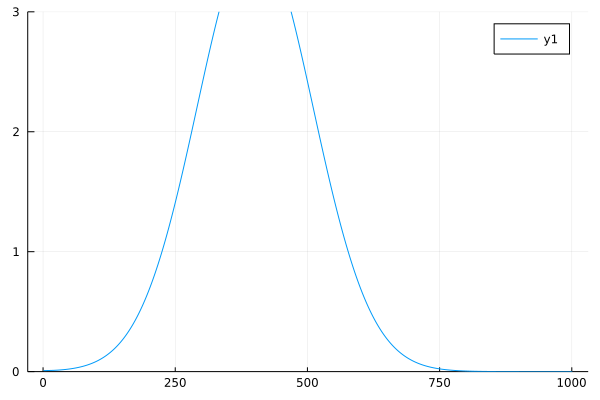

In [125]:
println(abs(sum(x)*dx-sum1)/sum1)
plot(x,ylim=(0.,3.0))

In [123]:
println(abs(sum(x)*dx-sum1)/sum1)

3.7536231835485714e-6
